# Introduccion a la Modulación OFDM
## Construcción de la señal
## Comportamiento con canales dispersivos

### Ing. Pablo De Césare

<img src=".\slice1.png">

<img src=".\slice2.png">

<img src=".\slice3.png">

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
from scipy import signal

In [2]:
mapping_table = {
    (0,0,0,0) : -3-3j,
    (0,0,0,1) : -3-1j,
    (0,0,1,0) : -3+3j,
    (0,0,1,1) : -3+1j,
    (0,1,0,0) : -1-3j,
    (0,1,0,1) : -1-1j,
    (0,1,1,0) : -1+3j,
    (0,1,1,1) : -1+1j,
    (1,0,0,0) :  3-3j,
    (1,0,0,1) :  3-1j,
    (1,0,1,0) :  3+3j,
    (1,0,1,1) :  3+1j,
    (1,1,0,0) :  1-3j,
    (1,1,0,1) :  1-1j,
    (1,1,1,0) :  1+3j,
    (1,1,1,1) :  1+1j
}


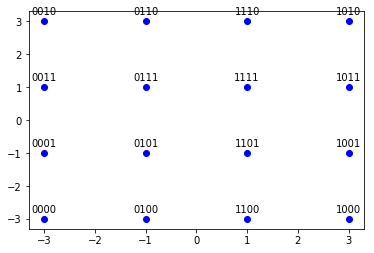

In [3]:
for b3 in [0, 1]:
    for b2 in [0, 1]:
        for b1 in [0, 1]:
            for b0 in [0, 1]:
                B = (b3, b2, b1, b0)
                Q = mapping_table[B]
                plt.plot(Q.real, Q.imag, 'bo')
                plt.text(Q.real, Q.imag+0.2, "".join(str(x) for x in B), ha='center')

In [4]:
demapping_table = {v : k for k, v in mapping_table.items()}


<img src=".\slice4.png">

<img src=".\slice5.jpg">

<img src=".\slice6.png">

<img src=".\slice7.png">

In [5]:
K = 64 # numero de portadoras OFDM 
CP = K//4  # duracion del prefijo ciclico
P = 8 # numero de portadoras piloto
pilotValue = 3+3j # valor del piloto...que es conocido por el receptor
allCarriers = np.arange(K)  # subportadoras ([0, 1, ... K-1])
fs=20 # 20MHz de frecuencia de muestreo de la ifft
ts=1/fs
t=np.linspace(0,ts*K,K+CP)  # nuestro futuro eje de tiempos

pilotCarriers = allCarriers[::K//P] # pilotos cada (K/P) 

# las pimer y ultima portadora las hacemos piloto
pilotCarriers = np.hstack([pilotCarriers, np.array([allCarriers[-1]])])
P = P+1

# el resto de las portadoras seran de dato
dataCarriers = np.delete(allCarriers, pilotCarriers)

print ("allCarriers:   %s" % allCarriers)
print ("pilotCarriers: %s" % pilotCarriers)
print ("dataCarriers:  %s" % dataCarriers)


allCarriers:   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
pilotCarriers: [ 0  8 16 24 32 40 48 56 63]
dataCarriers:  [ 1  2  3  4  5  6  7  9 10 11 12 13 14 15 17 18 19 20 21 22 23 25 26 27
 28 29 30 31 33 34 35 36 37 38 39 41 42 43 44 45 46 47 49 50 51 52 53 54
 55 57 58 59 60 61 62]


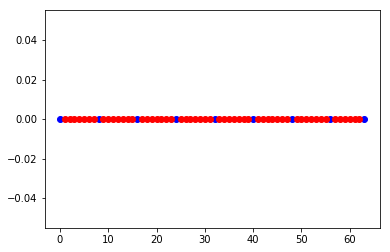

In [6]:
plt.plot(pilotCarriers, np.zeros_like(pilotCarriers), 'bo', label='pilot')
plt.plot(dataCarriers, np.zeros_like(dataCarriers), 'ro', label='data')

In [7]:
## Payload del simbolo OFDM

mu = 4 # bits por simbolo (i.e. 16QAM)
payloadBits_per_OFDM = len(dataCarriers)*mu  # numero de bits de datos por simbolo ofdm



## Canal wireless

Ahora definamos el canal wireless entre transmisor y receptor. Aquí, usamos un canal multitrayectoria de dos taps con un . Además, graficamos la respuesta de frecuencia correspondiente. Como vemos, el canal es selectivo en frecuencia. Además, definimos la relación señal-ruido en dB, que debería ocurrir en el receptor.

<img src=".\slice9.png">

<img src=".\slice10.png">

18

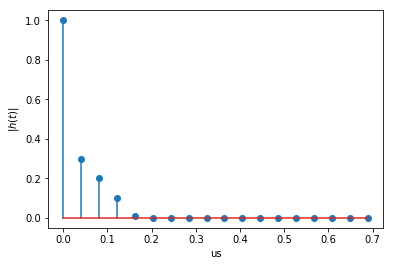

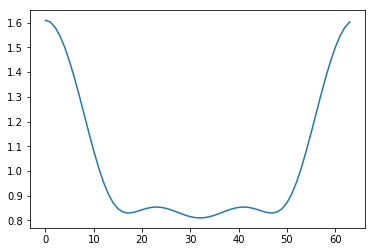

In [8]:
channelResponse = np.array([1,0.3,0.2,0.1,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0])  # Respuesta al impulso del canal de comunicaciones
plt.figure() ;plt.stem(t[0:len(channelResponse)],np.abs(channelResponse))
plt.xlabel('us'); plt.ylabel('$|h(t)|$');
H_exact = np.fft.fft(channelResponse, K)
plt.figure(); plt.plot(allCarriers, abs(H_exact))
SNRdb = 400  # signal to noise-ratio dB 
len(channelResponse)

# Armamos nuestro simbolo OFDM

In [9]:
bits = np.random.binomial(n=1, p=0.5, size=(payloadBits_per_OFDM, ))
print ("N° de bits: ", len(bits))
print ("Ej. de los 20 primeros: ", bits[:20])
print ("media: ", np.mean(bits))

N° de bits:  220
Ej. de los 20 primeros:  [1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1]
media:  0.4863636363636364


In [10]:
def SP(bits):
    return bits.reshape((len(dataCarriers), mu))
bits_SP = SP(bits)
print ("primeros 5 grupos")
print (bits_SP[:5,:])

primeros 5 grupos
[[1 1 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [1 1 0 1]
 [1 1 0 1]]


In [11]:
def Mapping(bits):
    return np.array([mapping_table[tuple(b)] for b in bits])
QAM = Mapping(bits_SP)
print ("primeros 5 simbolos QAM y bits:")
print (bits_SP[:5,:])
print (QAM[:5])

primeros 5 simbolos QAM y bits:
[[1 1 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [1 1 0 1]
 [1 1 0 1]]
[ 1.-3.j -1.-3.j  3.-3.j  1.-1.j  1.-1.j]


<img src=".\slice8.png">

In [12]:
def OFDM_symbol(QAM_payload):
    symbol = np.zeros(K, dtype=complex) #  K subcarriers
    symbol[pilotCarriers] = pilotValue  #  pilot subcarriers 
    symbol[dataCarriers] = QAM_payload  #  pilot subcarriers
    return symbol

OFDM_data = OFDM_symbol(QAM)


In [13]:
def IDFT(OFDM_data):
    return np.fft.ifft(OFDM_data)
OFDM_time = IDFT(OFDM_data)


## Prefijo Ciclico

<img src=".\slice11.png">

numero de muestras con CP:  80
80


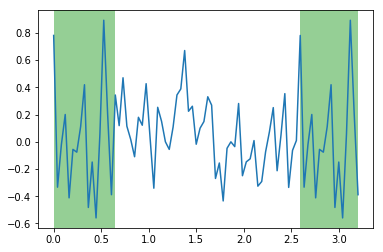

In [14]:
def addCP(OFDM_time):
    cp = OFDM_time[-CP:]               #  CP samples ...
    return np.hstack([cp, OFDM_time])  # ... al principio

def addNada(OFDM_time):                ## aca vamos a comparar despues que diferencia hay entre poner un CP o usar una guarda
    cp = np.zeros(CP)
    return np.hstack([cp, OFDM_time])


OFDM_withCP = addCP(OFDM_time)
print ("numero de muestras con CP: ", len(OFDM_withCP))

plt.plot(t,OFDM_withCP.real)
plt.axvspan(t[0],t[16], facecolor='#2ca02c', alpha=0.5)
plt.axvspan(t[80-16],t[-1], facecolor='#2ca02c', alpha=0.5)
print(len(t))

## Mandamos la señal a la antena, pero cuando la recibimos que llega???

Ahora, la señal se envía a la antena por aire al receptor. Entre ambas antenas, está el canal inalámbrico. Modelamos este canal como un canal multitrayecto estático con respuesta de impulso "channelResponse". Por lo tanto, la señal en la antena de recepción es la convolución de la señal de transmisión con la respuesta del canal. Además, agregamos algo de ruido a la señal de acuerdo con el valor SNR dado:

RX Signal power: 0.1766. Noise power: 0.0000


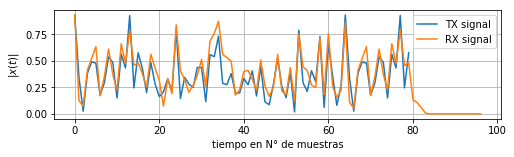

In [15]:
def channel(signal):
    convolved = np.convolve(signal, channelResponse)
    signal_power = np.mean(abs(convolved**2))
    sigma2 = signal_power * 10**(-SNRdb/10)  # Calcula la potencia de ruido en base al SNR
    print ("RX Signal power: %.4f. Noise power: %.4f" % (signal_power, sigma2))
    # Genero el ruido a partir de la varianza obtenida
    noise = np.sqrt(sigma2/2) * (np.random.randn(*convolved.shape)+1j*np.random.randn(*convolved.shape))
    return convolved + noise
OFDM_TX = OFDM_withCP
OFDM_RX = channel(OFDM_TX)
plt.figure(figsize=(8,2))
plt.plot(abs(OFDM_TX), label='TX signal')
plt.plot(abs(OFDM_RX), label='RX signal')
plt.legend(fontsize=10)
plt.xlabel('tiempo en N° de muestras'); plt.ylabel('$|x(t)|$');
plt.grid(True);

### Recivimos la señal despues de aber pasado por el canal

In [16]:
# sacamos el prefijo ciclico

def removeCP(signal):
    return signal[CP:(CP+K)]
OFDM_RX_noCP = removeCP(OFDM_RX)

In [17]:
# la señal es demodulada ahora usando la FFT

def DFT(OFDM_RX):
    return np.fft.fft(OFDM_RX)
OFDM_demod = DFT(OFDM_RX_noCP)

Como siguiente paso, el canal inalámbrico necesita ser estimado. Con fines ilustrativos, recurrimos a una simple estimación de canal de "zero-forcing" seguida de una simple interpolación. El principio de la estimación del canal es el siguiente:

La señal de transmisión contiene valores piloto en ciertas portadoras piloto. El receptor conoce estos valores piloto y su posición en el dominio de la frecuencia (es decir, el índice de portadora piloto). A partir de la información recibida en las subportadoras piloto, el receptor puede estimar el efecto del canal inalámbrico en esta subportadora (porque sabe qué se transmitió y qué se recibió). Por lo tanto, el receptor obtiene información sobre el canal inalámbrico en los operadores piloto. Sin embargo, quiere saber qué sucedió en las portadoras de datos. Para lograr esto, interpola los valores del canal entre los portadores piloto para obtener una estimación del canal en los portadores de datos.


In [18]:
def channelEstimate(OFDM_demod):
    pilots = OFDM_demod[pilotCarriers]  # Extraigo el piloto de la senal recibida
    Hest_at_pilots = pilots / pilotValue # Divido por el valor de los pilotos transmitidos
    # hago una interpolacion entre las portadoras piloto estimadas por el canal sobre las portadoras de datos
    Hest_abs = interpolate.interp1d(pilotCarriers, abs(Hest_at_pilots), kind='linear')(allCarriers)
    Hest_phase = interpolate.interp1d(pilotCarriers, np.angle(Hest_at_pilots), kind='linear')(allCarriers)
    Hest = Hest_abs * np.exp(1j*Hest_phase)
    
    plt.plot(allCarriers, abs(H_exact), label='Canal')
    plt.stem(pilotCarriers, abs(Hest_at_pilots), label='Piloto estimado')
    plt.plot(allCarriers, abs(Hest), label='Estimacion del canal por interpolación')
    plt.grid(True); plt.xlabel('Carrier index'); plt.ylabel('$|H(f)|$'); plt.legend(fontsize=10)
    plt.ylim(0,2)
    return Hest


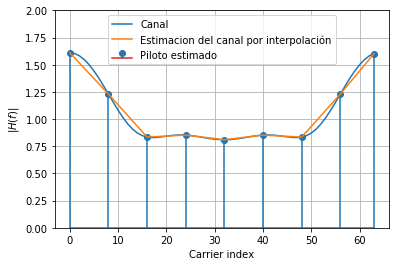

In [19]:
Hest = channelEstimate(OFDM_demod)

Ahora que el canal se estima en todas las portadoras, podemos usar esta información en el ecualizador del canal. Aquí, para cada subportadora, la influencia del canal se elimina de modo que recuperemos los símbolos de constelación claros (solo ruidosos).

In [20]:
def equalize(OFDM_demod, Hest):
    return OFDM_demod / Hest
equalized_Hest = equalize(OFDM_demod, Hest)

El siguiente paso es extraer los datos de las portadoras del símbolo ecualizado. Aquí, desechamos los portadores piloto, ya que no proporcionan ninguna información, sino que se utilizaron para el proceso de estimación del canal.

Text(0.5,1,'Hay que ecualizar!!!')

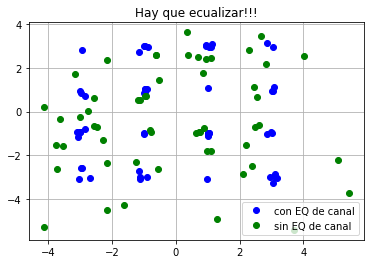

In [21]:
def get_payload(equalized):
    return equalized[dataCarriers]
QAM_est = get_payload(equalized_Hest)
QAM_sin_est = get_payload(OFDM_demod)

plt.plot(QAM_est.real, QAM_est.imag, 'bo',label="con EQ de canal");
plt.plot(QAM_sin_est.real, QAM_sin_est.imag, 'go',label="sin EQ de canal");
plt.grid(True); plt.legend(fontsize=10)
plt.title("Hay que ecualizar!!!")

# Volviendo a los Bits !!

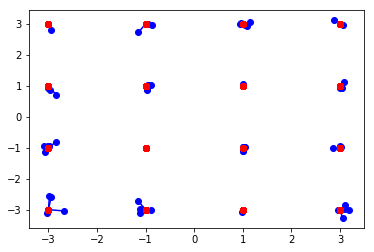

In [22]:
def Demapping(QAM):
    constellation = np.array([x for x in demapping_table.keys()]) # los puntos de la constelación
    dists = abs(QAM.reshape((-1,1)) - constellation.reshape((1,-1))) # Calcula la distacia entre los puntos y la constelacion
    const_index = dists.argmin(axis=1) # para cada punto de QAM, elijo en indice en la constelacion que pertenece al simbolo mas cercano 
    hardDecision = constellation[const_index] # punto real de la constelacion
    return np.vstack([demapping_table[C] for C in hardDecision]), hardDecision # transformo la constelación en bists

PS_est, hardDecision = Demapping(QAM_est)

for qam, hard in zip(QAM_est, hardDecision):
    plt.plot([qam.real, hard.real], [qam.imag, hard.imag], 'b-o');
    plt.plot(hardDecision.real, hardDecision.imag, 'ro')

# Medidas de Calidad
## EVM

El EVM es la relacion entre la potencia de error contra la potencia del simbolo
<img src=".\EVM_def2.png">


<img src=".\evm_hard.png">

In [23]:
Pref=hardDecision*np.conjugate(hardDecision)
#print("Potencia de referencia",Pref)

In [24]:
Perror=abs(hardDecision-QAM_est)**2
#print("potencia de Error",Perror)

-29.480784491181016

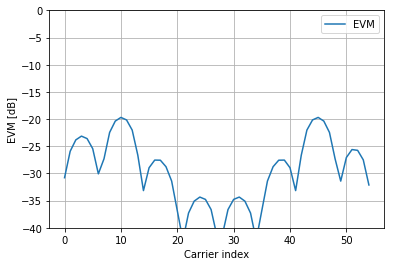

In [25]:
EVM=10*np.log10(Perror/Pref).real
plt.plot(np.arange(len(EVM)),EVM,label='EVM')
plt.grid(True); plt.xlabel('Carrier index'); plt.ylabel('EVM [dB]'); plt.legend(fontsize=10)
plt.ylim(-40,0)
np.mean(EVM)

<img src=".\EVM.png">

In [26]:
def PS(bits):
    return bits.reshape((-1,))
bits_est = PS(PS_est)

In [27]:
print ("Obtained Bit error rate: ", np.sum(abs(bits-bits_est))/len(bits))


Obtained Bit error rate:  0.0


# Preformance y robustez con una canal dispersivo

vamos a transmitir datos en "N_of_sym" simbolos OFDM, y en 16QAM en un canal con multiple trayectoria e intentaremmos recuperar los datos con las tecnicas vistas 

RX Signal power: 0.2319. Noise power: 0.0000


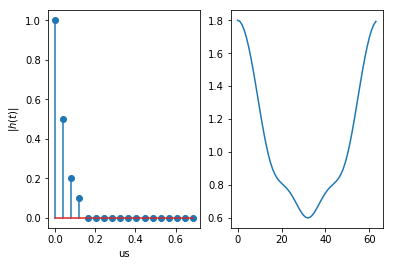

In [28]:
N_of_sym=30
frame=np.empty(0)

for sym in range(N_of_sym):
    bits = np.random.binomial(n=1, p=0.5, size=(payloadBits_per_OFDM, ))
    bits_SP = SP(bits)
    QAM = Mapping(bits_SP)
    OFDM_data = OFDM_symbol(QAM)
    OFDM_time = IDFT(OFDM_data)
    OFDM_withCP = addCP(OFDM_time)
    frame=np.append(frame,OFDM_withCP,axis=0)

    
## RESPUESTA DEL CANAL

channelResponse = np.array([1,0.5,0.2,0.1,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0])  # Respuesta al impulso del canal de comunicaciones
H_exact = np.fft.fft(channelResponse, K)
SNRdb = 400  # signal to noise-ratio dB 

plt.subplot(121)
plt.xlabel('us'); plt.ylabel('$|h(t)|$');
plt.stem(t[0:len(channelResponse)],np.abs(channelResponse))
plt.subplot(122)
plt.plot(allCarriers, abs(H_exact))

frame=channel(frame) # paso la trama por el canal
frame=frame[0:2400]  # recorto el tiempo extra luego de la convolución


<Figure size 432x288 with 0 Axes>

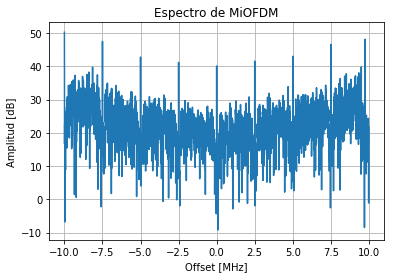

<Figure size 432x288 with 0 Axes>

In [29]:
fcia=np.linspace((-fs/2),(fs/2),len(frame))
plt.plot(fcia,20*np.log10(np.abs((np.fft.fft(frame)))))
plt.title("Espectro de MiOFDM")
plt.xlabel("Offset [MHz]")
plt.ylabel("Amplitud [dB]")
plt.grid(True)

plt.figure()


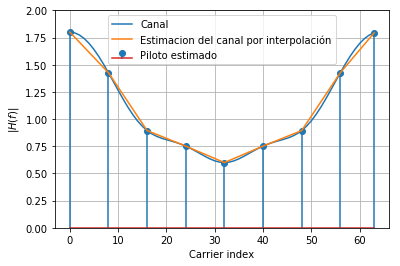

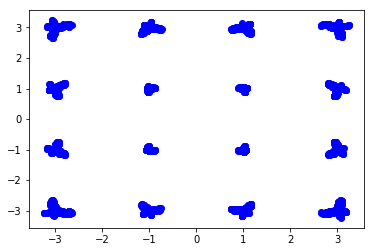

In [30]:
frames=frame.reshape(30,80) # separo cada simbolo
frames_Rx_NoCP=frames[:,16:] # saco el CP
OFDM_demod=DFT(frames_Rx_NoCP) # demodula el simbolo OFDM

Hest = channelEstimate(OFDM_demod[0]) ## estimo la respuesta del canal Hest

equalized_Hest = equalize(OFDM_demod, Hest)

OFDM_demodCP=equalized_Hest[:,dataCarriers]

fig, ax = plt.subplots()
ax.plot(OFDM_demodCP.real,OFDM_demodCP.imag,'bo')
plt.show()


# Y si en vez de un CP no ponemos nada?

In [31]:
N_of_sym=30
frame=np.empty(0)

for sym in range(N_of_sym):
    bits = np.random.binomial(n=1, p=0.5, size=(payloadBits_per_OFDM, ))
    bits_SP = SP(bits)
    QAM = Mapping(bits_SP)
    OFDM_data = OFDM_symbol(QAM)
    OFDM_time = IDFT(OFDM_data)
    OFDM_withCP = addNada(OFDM_time)
    frame=np.append(frame,OFDM_withCP,axis=0)

frame=channel(frame)
frame=frame[0:2400]


RX Signal power: 0.1822. Noise power: 0.0000


C:\Users\Telecomu\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


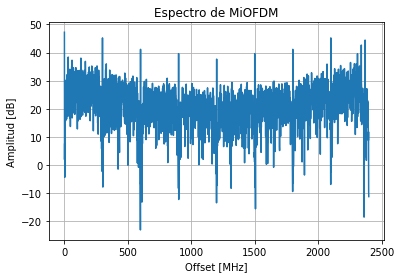

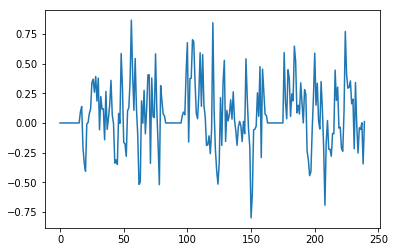

In [32]:
fcia=np.linspace((-fs/2),(fs/2),len(frame))
#plt.subplot(121)
plt.figure()
plt.plot(20*np.log10(np.abs((np.fft.fft(frame)))))
plt.title("Espectro de MiOFDM")
plt.xlabel("Offset [MHz]")
plt.ylabel("Amplitud [dB]")
plt.grid(True)

#plt.subplot(122)
plt.figure()
plt.plot(frame[0:240])

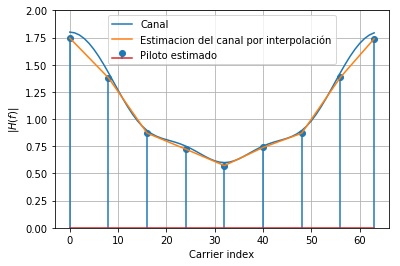

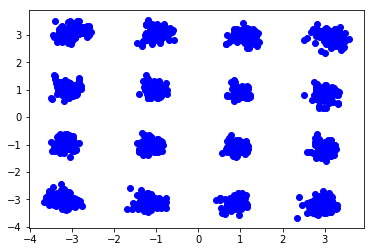

In [33]:
frames=frame.reshape(30,80)

frames_Rx_NoCP=frames[:,16:]

OFDM_demod=DFT(frames_Rx_NoCP)

Hest = channelEstimate(OFDM_demod[0]) ## estimo la respuesta del canal Hest

equalized_Hest = equalize(OFDM_demod, Hest)

OFDM_demod_sinCP=equalized_Hest[:,dataCarriers]

fig, ax = plt.subplots()
ax.plot(OFDM_demod_sinCP.real,OFDM_demod_sinCP.imag,'bo')
plt.show()



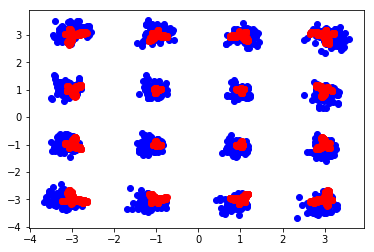

In [36]:
fig, ax = plt.subplots()
ax.plot(OFDM_demod_sinCP.real,OFDM_demod_sinCP.imag,'bo')
ax.plot(OFDM_demodCP.real,OFDM_demodCP.imag,'ro')
plt.show()